
## 3 Exploratory Data Analysis
###  * 3.1 Importing Data
###  * 3.2 Explorations of Data
    * 3.2.1 Distributions of the Variables
    * 3.2.2 Mean and Medians
###  * 3.3 Plotting Variables and Examine Correlations
###  * 3.4 Categorical Features Exploring
###  * 3.5 Hypothesis Testing on Positions
    * 3.5.1 Permutation Hypothesis Testing

### 3.1 Importing Data

In [191]:
import pandas as pd
import numpy as np
import numpy.random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [12]:
file = '../Capstone_Project2/Raw_data/df_after_wrangling.csv'
df = pd.read_csv(file, index_col='Unnamed: 0')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
0,1,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,...,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4,2711280
2,3,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,...,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7,17073171
3,4,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,...,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7,28103550
7,5,LaMarcus Aldridge\aldrila01,C,35,SAS,21,18,25.9,5.5,11.8,...,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3,2641691
10,5,LaMarcus Aldridge\aldrila01,C,35,BRK,5,5,26.0,5.0,9.6,...,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3,2641691


### 3.2 Exploring Data

#### 3.2.1 Distribution and Heat Map

The first step of our EDA is that we want to look at the distribution of some of the continuous variables in our dataset.

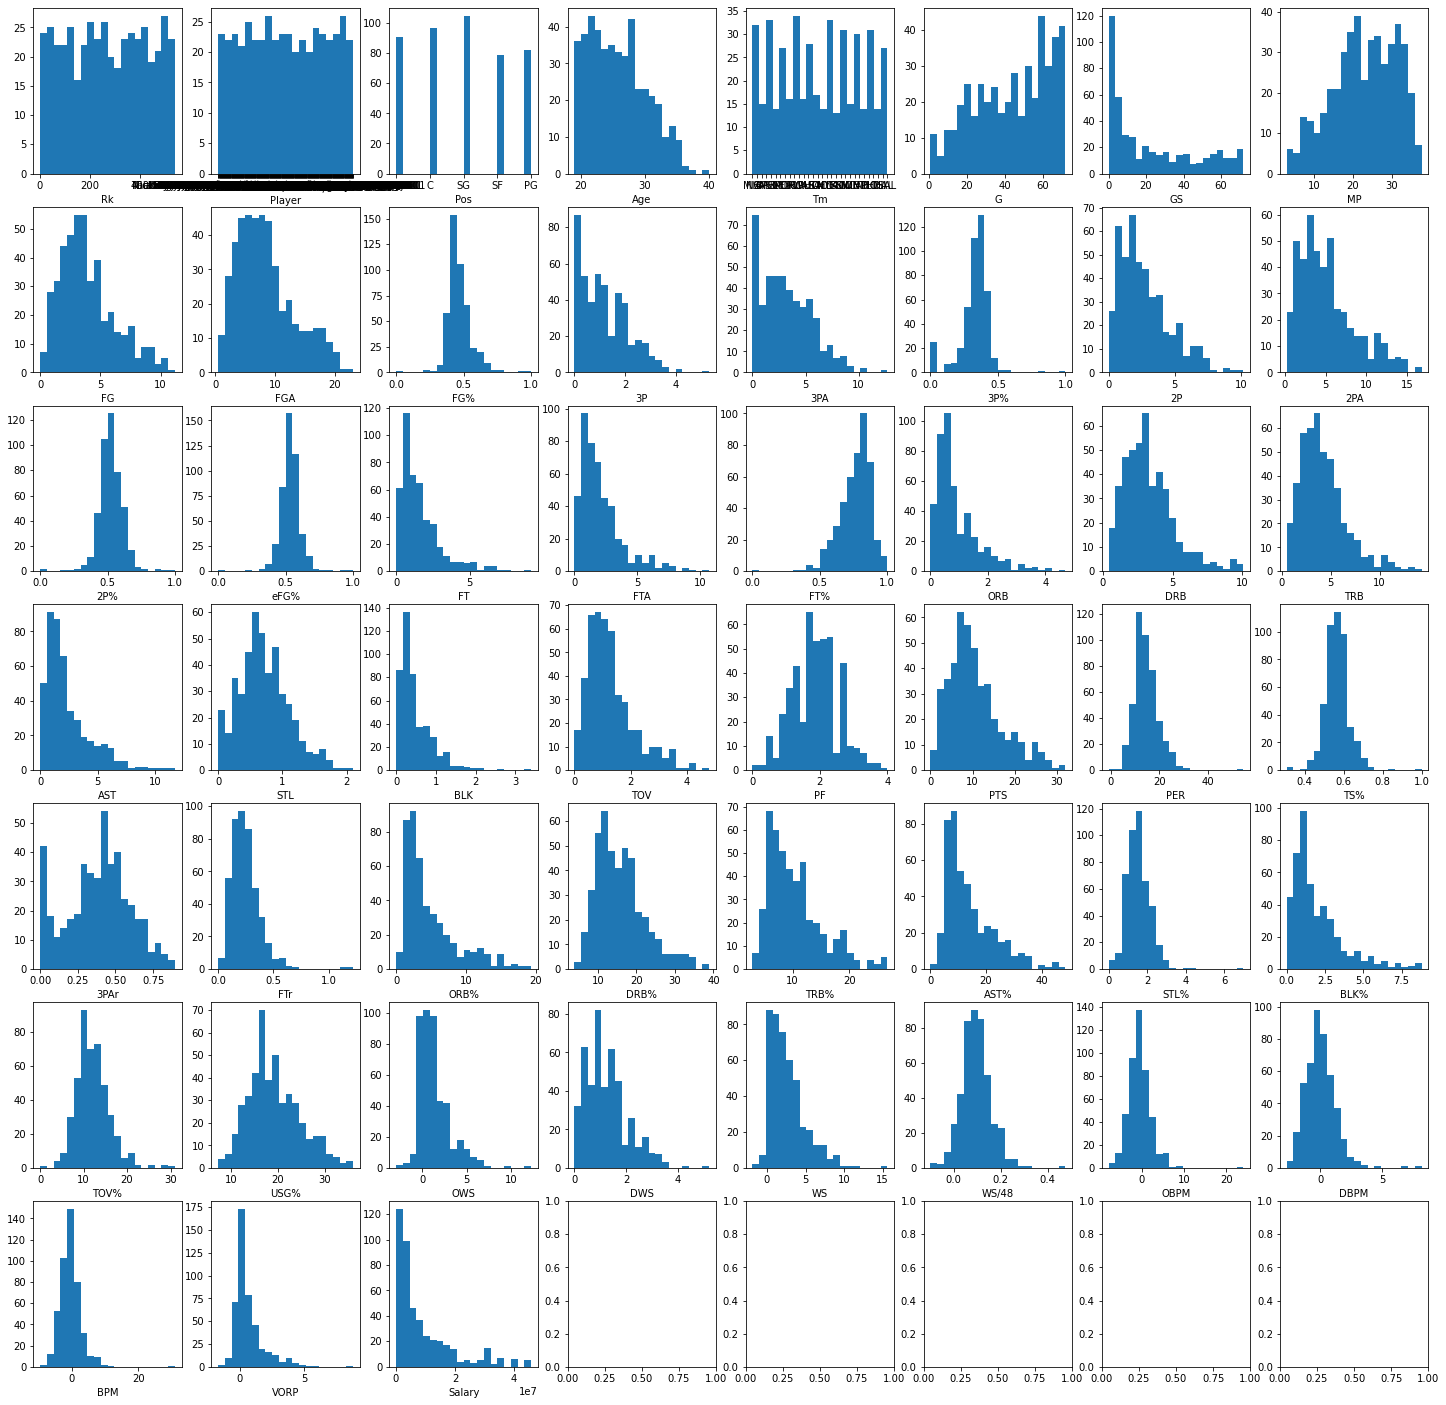

In [39]:
fig, ax = plt.subplots(7, 8, figsize=(25,25))
k=0

columns = df.columns
for i in range(7):
    if i == df.shape[1]:
        break
    for j in range(8):
        if k == df.shape[1]:
            break
        ax[i][j].hist(df.iloc[:, k], bins=20)
        ax[i][j].set_xlabel(columns[k])
        
        k+=1
        

A few things we have noticed
--
#### 1. Age seems to be clustering around 20 with one bin being close to the max around the age of 27.
#### 2. While shooting percentages and 3 point percentages tend to follow a normal distribution, field goals made and attemps tend to be a shape that is skewed to the right
#### 3. Salary is also skewed to the right, with certain bins popping at the very end.

From the graph, we can see that salary is not normally distributed, with more players having salary that are low.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 0 to 1344
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      454 non-null    int64  
 1   Player  454 non-null    object 
 2   Pos     454 non-null    object 
 3   Age     454 non-null    int64  
 4   Tm      454 non-null    object 
 5   G       454 non-null    int64  
 6   GS      454 non-null    int64  
 7   MP      454 non-null    float64
 8   FG      454 non-null    float64
 9   FGA     454 non-null    float64
 10  FG%     454 non-null    float64
 11  3P      454 non-null    float64
 12  3PA     454 non-null    float64
 13  3P%     440 non-null    float64
 14  2P      454 non-null    float64
 15  2PA     454 non-null    float64
 16  2P%     454 non-null    float64
 17  eFG%    454 non-null    float64
 18  FT      454 non-null    float64
 19  FTA     454 non-null    float64
 20  FT%     450 non-null    float64
 21  ORB     454 non-null    float64
 22  D

<AxesSubplot:>

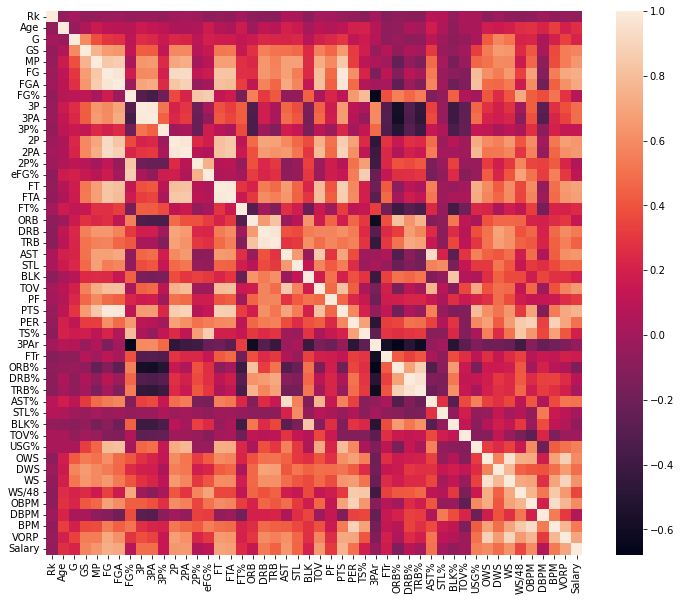

In [42]:
df.info()

plt.subplots(figsize=(12,10))
sns.heatmap(df.corr())



#### From the graph, we can see that a lot fo things are correlated with salary, but none of them have a color close to one.

#### 3.2.2 Mean and Med

In [47]:
df_mean = df.describe().loc['mean',:]
df_mean

Rk        2.706894e+02
Age       2.596696e+01
G         4.391630e+01
GS        2.296035e+01
MP        2.285022e+01
FG        3.919604e+00
FGA       8.419604e+00
FG%       4.667423e-01
3P        1.180396e+00
3PA       3.247577e+00
3P%       3.283682e-01
2P        2.742952e+00
2PA       5.178194e+00
2P%       5.237445e-01
eFG%      5.351366e-01
FT        1.637225e+00
FTA       2.108590e+00
FT%       7.616356e-01
ORB       9.442731e-01
DRB       3.304185e+00
TRB       4.246256e+00
AST       2.356828e+00
STL       7.290749e-01
BLK       4.843612e-01
TOV       1.274890e+00
PF        1.849559e+00
PTS       1.065374e+01
PER       1.450176e+01
TS%       5.672974e-01
3PAr      3.848590e-01
FTr       2.479163e-01
ORB%      4.828855e+00
DRB%      1.591982e+01
TRB%      1.037070e+01
AST%      1.407093e+01
STL%      1.534361e+00
BLK%      1.975991e+00
TOV%      1.207555e+01
USG%      1.920264e+01
OWS       1.349780e+00
DWS       1.225991e+00
WS        2.577093e+00
WS/48     9.552203e-02
OBPM     -4

#### 3.2.3 Examing Salaries Columns

In [50]:
df_salary = df.sort_values('Salary', ascending=False)
df_salary.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
289,116,Stephen Curry\curryst01,PG,32,GSW,63,63,34.2,10.4,21.7,...,34.8,6.5,2.5,9.0,0.201,8.3,0.4,8.7,5.8,45780966
1272,509,John Wall\walljo01,PG,30,HOU,40,40,32.2,7.3,18.2,...,31.7,-1.0,0.8,-0.2,-0.007,1.2,-1.9,-0.7,0.4,44310840
1297,517,Russell Westbrook\westbru01,PG,32,WAS,65,65,36.4,8.4,19.0,...,30.2,0.5,3.2,3.7,0.075,2.6,1.1,3.7,3.4,44211146
479,201,James Harden\hardeja01,PG,31,BRK,36,35,36.6,7.8,16.6,...,28.4,5.3,1.7,7.0,0.208,6.2,1.0,7.2,3.7,43848000
476,201,James Harden\hardeja01,SG,31,HOU,8,8,36.3,7.5,16.9,...,28.4,5.3,1.7,7.0,0.208,6.2,1.0,7.2,3.7,43848000


In [53]:
df_scoring = df.sort_values('PTS', ascending=False)
df_scoring

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
289,116,Stephen Curry\curryst01,PG,32,GSW,63,63,34.2,10.4,21.7,...,34.8,6.5,2.5,9.0,0.201,8.3,0.4,8.7,5.8,45780966
70,38,Bradley Beal\bealbr01,SG,27,WAS,60,60,35.8,11.2,23.0,...,34.1,4.2,1.7,5.9,0.132,4.8,-1.4,3.4,2.9,34502130
798,297,Damian Lillard\lillada01,PG,30,POR,67,67,35.8,9.0,19.9,...,31.4,9.6,0.8,10.4,0.209,7.5,-1.3,6.3,5.0,39344900
352,146,Joel Embiid\embiijo01,C,26,PHI,51,51,31.1,9.0,17.6,...,35.3,5.6,3.2,8.8,0.266,6.3,1.2,7.5,3.8,31579390
35,12,Giannis Antetokounmpo\antetgi01,PF,26,MIL,61,61,33.0,10.3,18.0,...,32.5,6.9,3.3,10.2,0.244,6.2,2.8,9.0,5.6,39344970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,506,Moritz Wagner\wagnemo01,C,23,BOS,9,1,6.8,0.4,1.6,...,18.1,0.5,0.8,1.2,0.082,-2.7,0.2,-2.6,-0.1,1729217
54,23,Udoka Azubuike\azubuud01,C,21,UTA,15,0,3.8,0.3,0.6,...,12.4,0.0,0.1,0.1,0.119,-5.5,1.7,-3.8,0.0,2075880
1166,476,Tyrell Terry\terryty01,PG,20,DAL,11,0,5.1,0.5,1.5,...,15.3,-0.1,0.1,-0.1,-0.049,-7.5,2.6,-5.0,0.0,1517981
1060,427,Nick Richards\richani01,PF,23,CHO,18,0,3.5,0.2,0.5,...,11.5,0.0,0.0,0.0,0.026,-5.9,-2.1,-8.0,-0.1,1517981


#### From the data frames, we can see that Stephen Curry is the highest paid player and the highest scorer. It would make sense to believe that scoring and salaries are highly correlated.

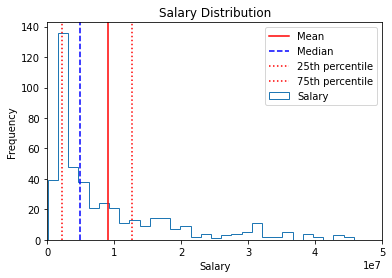

In [73]:
mean_salary = np.mean(df.Salary)
median_salary = np.median(df.Salary)

_ = plt.figure()
_ = df.Salary.plot(kind='hist', histtype='step', bins=30)
_ = plt.xlabel("Salary")
_ = plt.xlim(0, 50000000)
_ = plt.title("Salary Distribution")
_ = plt.axvline(mean_salary, c='r', label='Mean')
_ = plt.axvline(median_salary, c='b', linestyle='--', label='Median')
_ = plt.axvline(df.Salary.quantile(0.25), c='r', linestyle=':', label='25th percentile')
_ = plt.axvline(df.Salary.quantile(0.75), c='r', linestyle=':', label='75th percentile')
_ = plt.legend()
plt.show()

### 3.3 Plotting Variables and Examine Correlations

Since we already know our target feature, we should draw some scatter plots to see what data have a correlation with the salary column.

In [132]:
def scatterplots(columns, ncol=None, figsize=(25, 25)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Salary', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

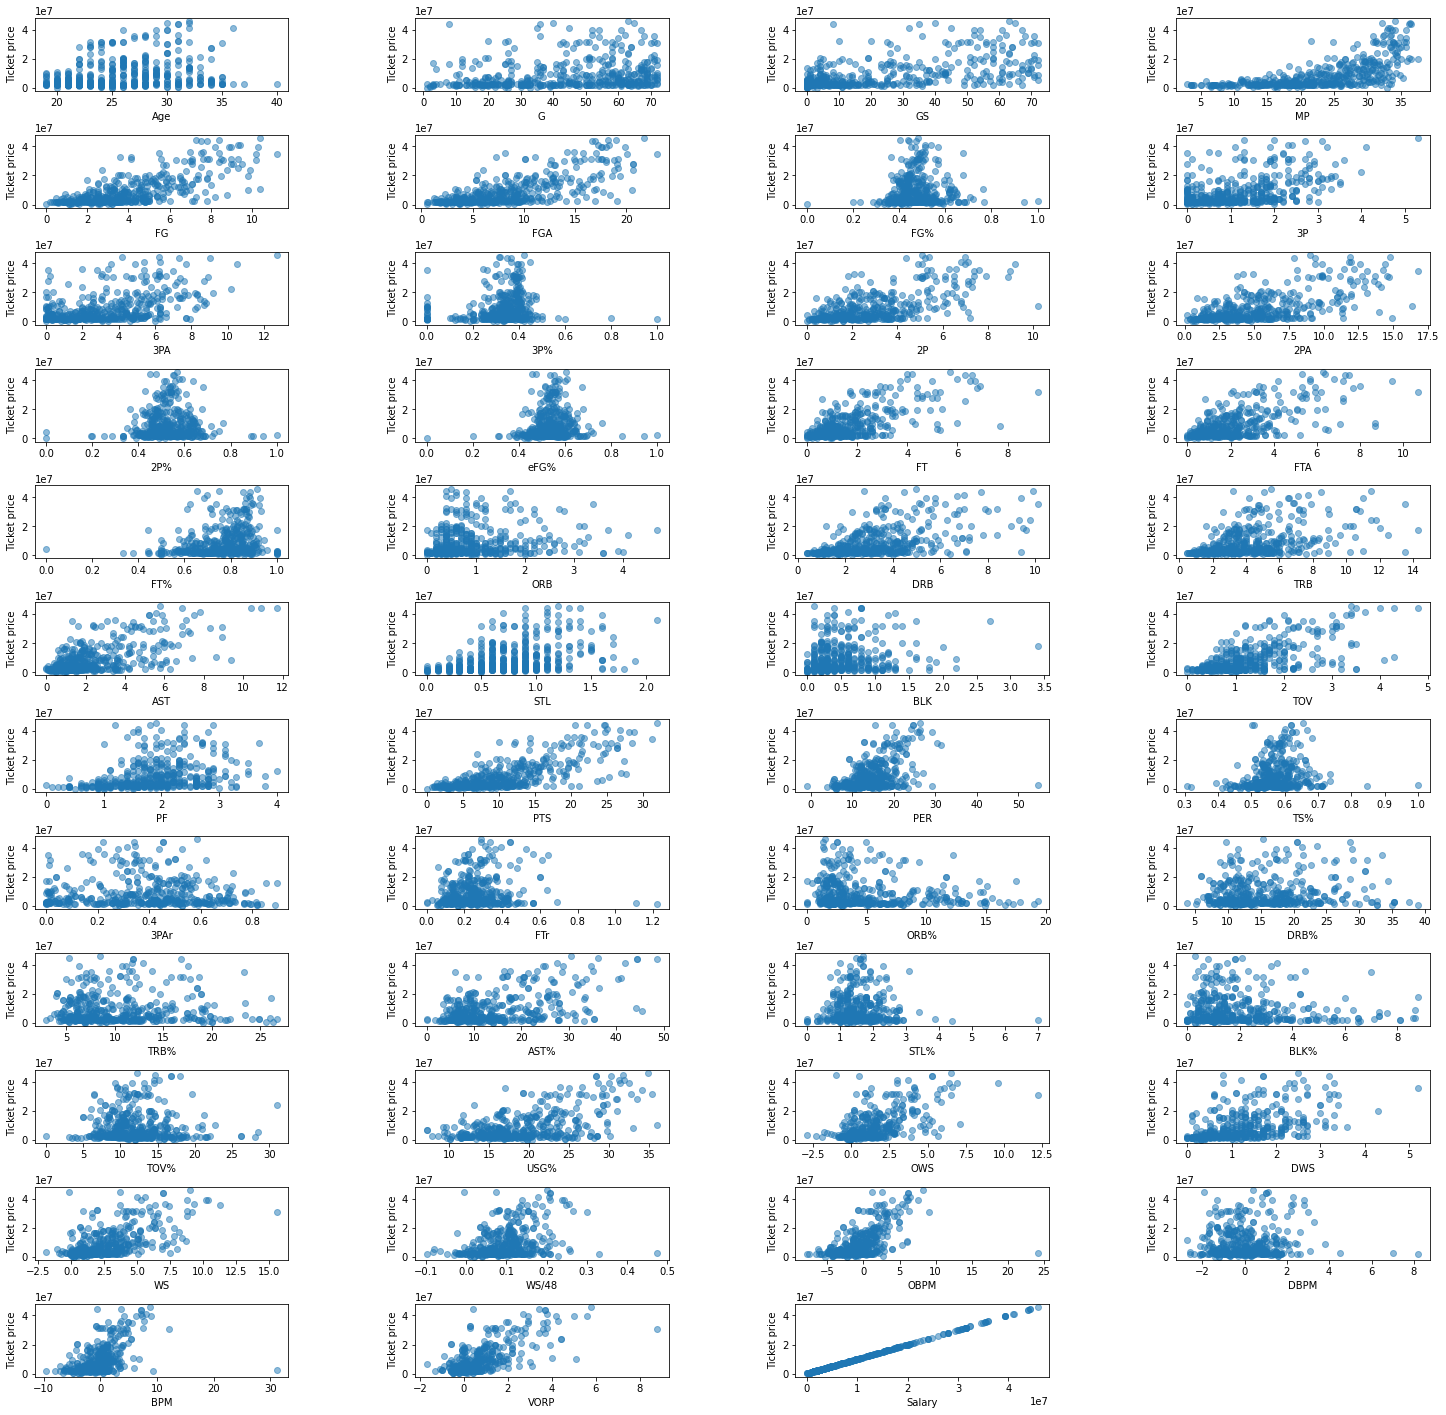

In [133]:
features = [a for a in df.columns if a not in ['Rk', 'Player', 'Pos', 'Tm']]
scatterplots(features, ncol=4)

In [80]:
#First we can see what variables have a relatively high correlations with salary
salary_correlations = df.corr().loc['Salary']
salary_correlations.sort_values(ascending=False)

Salary    1.000000
PTS       0.753240
FG        0.734431
FGA       0.714919
VORP      0.700504
FT        0.691903
FTA       0.669854
2PA       0.652440
TOV       0.647032
MP        0.645760
2P        0.644801
AST       0.638246
WS        0.621979
OBPM      0.595794
OWS       0.595153
GS        0.571355
USG%      0.553499
BPM       0.532728
DRB       0.528392
AST%      0.508455
PER       0.497591
DWS       0.488208
3P        0.487513
3PA       0.483417
STL       0.455381
TRB       0.443612
WS/48     0.351978
PF        0.309866
Age       0.260280
FT%       0.242972
G         0.216306
BLK       0.205603
TS%       0.193518
FTr       0.162424
3P%       0.139626
ORB       0.139121
eFG%      0.108427
DRB%      0.094288
FG%       0.087931
DBPM      0.057979
2P%       0.047926
TRB%      0.013904
STL%      0.005446
TOV%     -0.009379
3PAr     -0.052492
Rk       -0.058080
BLK%     -0.061897
ORB%     -0.134637
Name: Salary, dtype: float64

#### From the list, we can see that PTS, FG, FGA, and VORP have a correlation with salary that is above 0.7.

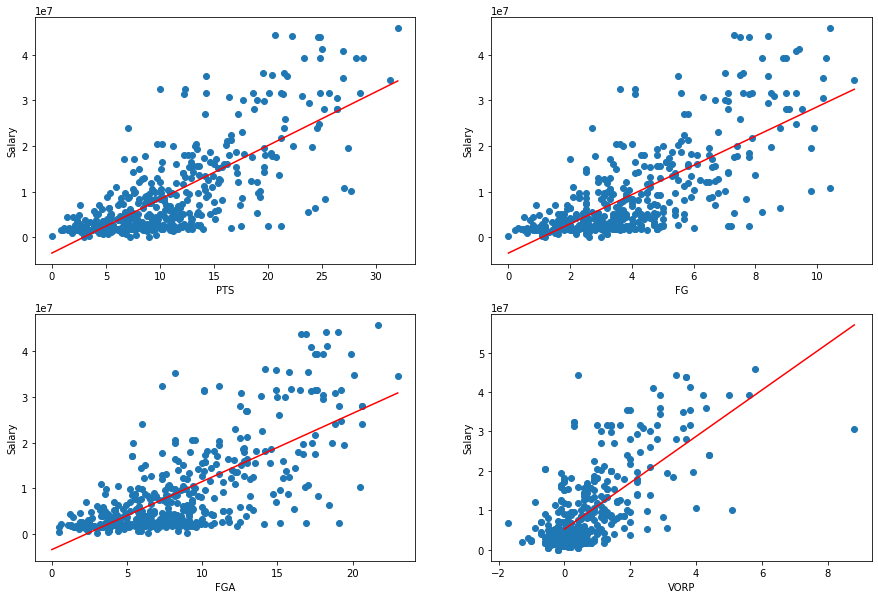

In [120]:
columns = ['PTS', 'FG', 'FGA', 'VORP']
fig, ax = plt.subplots(2, 2, figsize=(15,10))
k = 0
for i in range(2):
    for j in range(2):
        
        a, b = np.polyfit(df.loc[:,columns[k]], df['Salary'], deg=1)
        x_range = np.array([0, max(df.loc[:, columns[k]])])
        ax[i][j].scatter(x=df[columns[k]], y=df.loc[:,'Salary'])    
        ax[i][j].set_xlabel(columns[k])
        ax[i][j].set_ylabel('Salary')
        ax[i][j].plot(x_range, a*x_range +b, color='r')
        k+=1

#### From the graph, we can see that these four scatterplots tend to cluster when the x values are low.
#### Now that we have explored some numerical features and distributions of some of the variables, we could explore some categorical features with salaries.

### 3.4 Categorical Features

Let's examine the swarmplots for positions and salaries.

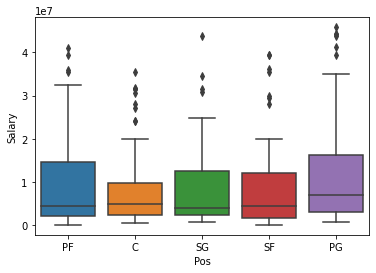

In [121]:
_ = sns.boxplot(x='Pos', y='Salary', data=df)

In [122]:
print("It seems like the median salary for being a point guard is the highest among all other positions")

It seems like the median salary for being a point guard is the highest among all other positions


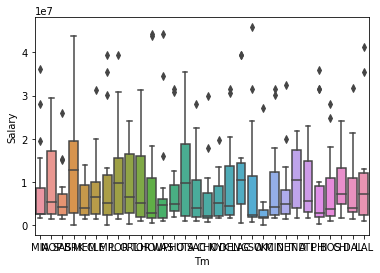

In [134]:
_ = sns.boxplot(x='Tm', y='Salary', data=df)

In [138]:
df_by_pos = df.groupby('Pos').mean().Salary
df_by_pos

Pos
C     8.029943e+06
PF    9.481715e+06
PG    1.194433e+07
SF    8.262038e+06
SG    8.181650e+06
Name: Salary, dtype: float64

#### From the numbers above, we can tell that on average, point guards are getting paid a little more than the rest of the populations. We should examine that in our hypothesis testing, since positions might be a good indicators on how much a player should get paid for.

In [141]:
df_no_pg = df[df.Pos != 'PG']
df_no_pg.Salary.mean()

8477190.129032258

In [146]:
df.sort_values(by='Salary', ascending=False).head(15)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary
289,116,Stephen Curry\curryst01,PG,32,GSW,63,63,34.2,10.4,21.7,...,34.8,6.5,2.5,9.0,0.201,8.3,0.4,8.7,5.8,45780966
1272,509,John Wall\walljo01,PG,30,HOU,40,40,32.2,7.3,18.2,...,31.7,-1.0,0.8,-0.2,-0.007,1.2,-1.9,-0.7,0.4,44310840
1297,517,Russell Westbrook\westbru01,PG,32,WAS,65,65,36.4,8.4,19.0,...,30.2,0.5,3.2,3.7,0.075,2.6,1.1,3.7,3.4,44211146
479,201,James Harden\hardeja01,PG,31,BRK,36,35,36.6,7.8,16.6,...,28.4,5.3,1.7,7.0,0.208,6.2,1.0,7.2,3.7,43848000
476,201,James Harden\hardeja01,SG,31,HOU,8,8,36.3,7.5,16.9,...,28.4,5.3,1.7,7.0,0.208,6.2,1.0,7.2,3.7,43848000
644,252,LeBron James\jamesle01,PG,36,LAL,45,45,33.4,9.4,18.3,...,31.9,3.0,2.6,5.6,0.179,5.9,2.3,8.1,3.8,41180544
346,140,Kevin Durant\duranke01,PF,32,BRK,35,32,33.1,9.3,17.2,...,31.2,3.7,1.2,5.0,0.206,6.4,0.8,7.2,2.7,40918900
404,174,Paul George\georgpa01,SF,30,LAC,54,54,33.7,8.2,17.6,...,30.0,3.0,2.3,5.3,0.139,3.9,0.3,4.2,2.9,39344970
35,12,Giannis Antetokounmpo\antetgi01,PF,26,MIL,61,61,33.0,10.3,18.0,...,32.5,6.9,3.3,10.2,0.244,6.2,2.8,9.0,5.6,39344970
798,297,Damian Lillard\lillada01,PG,30,POR,67,67,35.8,9.0,19.9,...,31.4,9.6,0.8,10.4,0.209,7.5,-1.3,6.3,5.0,39344900


In [147]:
print("It seems like a lot of players at the top of the salary list are all point guards, which means that the outliers for salary are most likely to be point guards.")

It seems like a lot of players at the top of the salary list are all point guards, which means that the outliers for salary are most likely to be point guards.


### 3.5 Hypothesis Testing

#### To test whether positions have an impact on salaries, we can make a label for players, such that point guards will be labeled as a group, we treat everyone else that is not a point guard.

In [171]:
def pg_t(a):
    if a.Pos == 'PG':
        return 1
    else:
        return 0


In [181]:
df['PG_check'] = [int(a) for a in (df.Pos == 'PG')]

In [189]:
df[df.Pos == 'PG'].PG_check.unique()

array([1])

### Null hypothesis: Being point guards do not make you get paid higher.

### We reject the null hypothesis with p=0.05

### We will do a permutation test with regard to players' positions and salaries, and we are trying to find the distribution of the differences

In [210]:
np.random.seed(0)
difference = list()

for i in range(10000):    
    df['Permutation'] = np.random.permutation(df['Salary'])
    diff = np.mean(df[df.PG_check == 1].Salary) - np.mean(df[df.PG_check == 0].Salary)
    difference.append(diff)



/var/folders/4m/qh070ww90rqgmcw604kkdt8r0000gn/T/ipykernel_66880/330430788.py:4: UserWarning: Attempting to set identical left == right == 3467136.6392604243 results in singular transformations; automatically expanding.
  _ = plt.xlim([difference.min(), difference.max()])


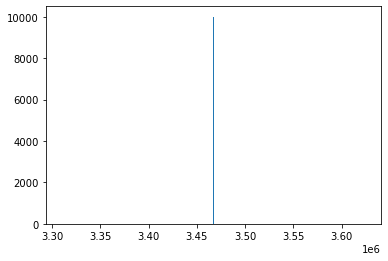

In [230]:
mean_difference = np.mean(difference)
difference = np.array(difference)
_ = plt.hist(np.array(difference), histtype='step')
_ = plt.xlim([difference.min(), difference.max()])

We could make a 95 confidence interval right here, but from the graph we can tell the difference is really uniform or normal, with one very high value. We could calculate the values, but just from the distribution of the permutation of the difference of the means, we can say that 

In [218]:
(mean_difference - np.mean(df.Salary))/np.std(df.Salary)

-0.5694670522819784

In [219]:
mean_difference

3467136.6392604257

In [224]:
pg_salary_mean = np.mean(df[df.PG_check == 1].Salary)
non_pg_sm = np.mean(df[df.PG_check == 0].Salary)
observed_dff = pg_salary_mean - non_pg_sm

In [232]:
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= observed_dff):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -observed_dff):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))

p = 1 - ((len(positiveExtremes)) + len(negativeExtremes))/10000
print(p)

10000
0
0.0


Since we got a p-value smaller than 0.05, we say that we reject the null hypothesis that being a point guard does not make you get paid moe. As a result, we keep the position variables for our future models.